In [1]:
from cpnLES_MSCARTlib import POLCARTdset
from cpnRetrievalslib import Bispec_LUT
import cpnCommonlib as cpn
import matplotlib.pyplot as plt
cpn.setup_figures(plt)


In [2]:
#Old LUTs
SZA=120
LUT=Bispec_LUT('/umbc/xfs1/zzbatmos/users/charaj1/LES_MSCART_retrievals/LUTs/',\
                   'MODIS_LUT_extended_SZA%03d_RAA000.nc'%(180-int(SZA)))
LUT.readLUT()

### Sanity check with previous LUTs

In [20]:
#testing microphysics computations
testm2=POLCARTdset('cfree',nmldpath='b0p860_fields/')
testm2.readMSCARTplus('testMP20p860_ve0p05re12p50COT5p12SZA120_NPH1e3.nc',fdpath='results/b0p860/',clm=True,step=True)
testm2.remove_redundant_nadir()
testmS=POLCARTdset('cfree',nmldpath='b2p13_fields/')
testmS.readMSCARTplus('testMP22p13_ve0p05re12p50COT5p12SZA120_NPH1e3.nc',fdpath='results/b2p13/',clm=True,step=True)
testmS.remove_redundant_nadir()

testMP20p860_ve0p05re12p50COT5p12SZA120_NPH1e3.nc is a single batch file
testMP22p13_ve0p05re12p50COT5p12SZA120_NPH1e3.nc is a single batch file


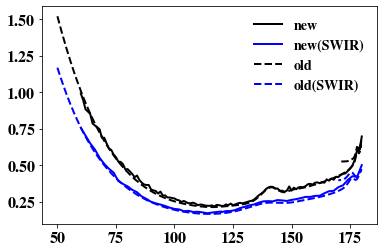

In [21]:
plt.plot(testm2.ScatA,testm2.MeanPRad[:,0],'k',label='new')
plt.plot(testmS.ScatA,testmS.MeanPRad[:,0],'b',label='new(SWIR)')
plt.plot(LUT.scat,LUT.I[0,57,4,21,:],'k--',label='old')#LUT.I(band,COT,ve,re,scatA)
plt.plot(LUT.scat,LUT.I[1,57,4,21,:],'b--',label='old(SWIR)')#LUT.I(band,COT,ve,re,scatA)
plt.legend()

In [22]:
testmS.MeanPRad.shape

(61, 4)

In [18]:
np.linspace(0,60,31)

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
       52., 54., 56., 58., 60.])

In [5]:
cfree.MeanPRad.shape

(122, 4)

In [7]:
cfree.remove_redundant_nadir()

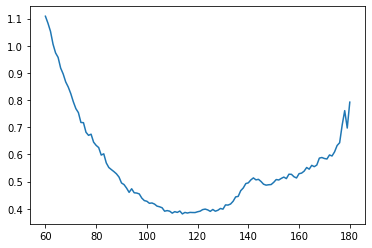

In [11]:
plt.plot(cfree.ScatA,cfree.MeanPRad[:,0])